# Task 2 
Start trying to pick out minima pairs

In [1]:
#import libraries
import igraph
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
#load in data files
min_data = pd.read_table('C:/Users/ckcho/OneDrive/Desktop/KCL Bioinformatics/Research_project/TAR/min.data', header=None, sep='\s+')
ts_data = pd.read_table('C:/Users/ckcho/OneDrive/Desktop/KCL Bioinformatics/Research_project/TAR/ts.data', header=None, sep='\s+')
print(min_data.shape, ts_data.shape)

(1621, 6) (1674, 8)


In [3]:
from collections import defaultdict
#slice out free energy values and indexes
min_energy = min_data[0]

ts_index = ts_data[[3,4]]
ts_energy = ts_data[[0]]

In [4]:
ts_energy

,0
0,-6873.634398
1,-6853.754050
2,-6860.489376
3,-6860.942934
4,-6865.165206
...,...
1669,-6867.908193
1670,-6863.995192
1671,-6879.466603
1672,-6867.283259


## Randomly selecting minima 

<function matplotlib.pyplot.show(close=None, block=None)>

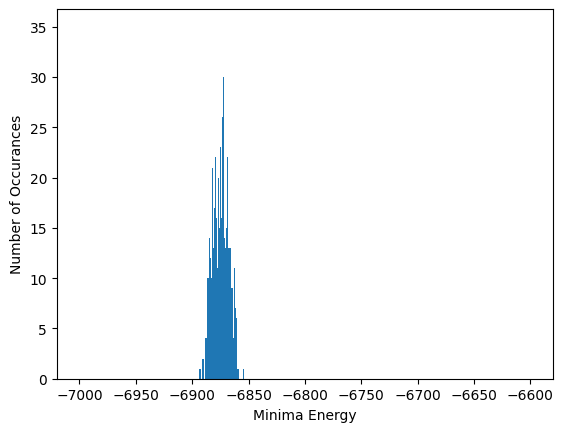

In [5]:
# histogram of minima energy distribution, focusing on the main cluster
plt.hist(min_energy, bins=1621, range=(-7000, -6600))
plt.xlabel("Minima Energy")
plt.ylabel("Number of Occurances")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

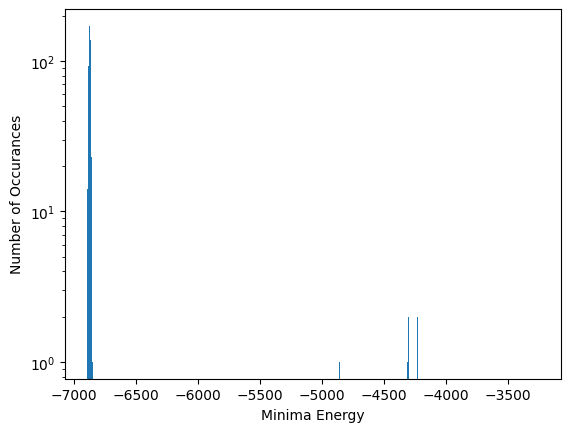

In [6]:
# histogram of overall minima energy distribution
plt.hist(min_energy, bins=1621, log=True)
plt.xlabel("Minima Energy")
plt.ylabel("Number of Occurances")
plt.show

In [69]:
#function for randomly picking out a given number of minima pairs
import random
import itertools

def image_generator(iterable, groups, samplesize):
    grouped = (i for i in itertools.product(iterable,repeat=groups) if i[0]!=i[1])
    return random.sample(list(grouped), samplesize)

sample = image_generator(min_energy, 2, 50)

In [45]:
print(sample)

[(-6877.88946858839, -6885.397017373418), (-6879.880657080416, -6872.651247220913), (-6874.780027945128, -6868.960215290884), (-6875.273087258684, -6877.1016426716415), (-6882.018706836507, -6870.842162607233), (-6875.794793458185, -6873.731700501264), (-6873.363606410392, -6882.379242148234), (-6876.551252056297, -6894.95839647998), (-6880.018899679067, -6872.450665335102), (-6869.017381066207, -6871.759188717634), (-6876.387615092697, -6880.622540457873), (-6868.505477915239, -6893.270074763254), (-6864.6194400754885, -6880.378395771786), (-6881.0152232706, -6867.94574807806), (-6868.410856034061, -6867.2131828725005), (-6867.630682589199, -6881.4030262176975), (-6884.984641678546, -6868.562425200113), (-6884.642268318233, -6879.972261933665), (-6880.7670926053615, -6875.412931908924), (-6878.685979006188, -6879.401186556772), (-6876.510869152866, -6871.95356912072), (-6876.758101457208, -6882.524315879902), (-6864.07302038067, -6875.526493478839), (-6879.789423972693, -6881.03114061

In [70]:
#splitting selected pairs into 1st half and 2nd half for graphing and calculation later
sample1 = list(list(zip(*sample))[0])
sample2 = list(list(zip(*sample))[1])

In [63]:
sample_list = sample1 + sample2

<function matplotlib.pyplot.show(close=None, block=None)>

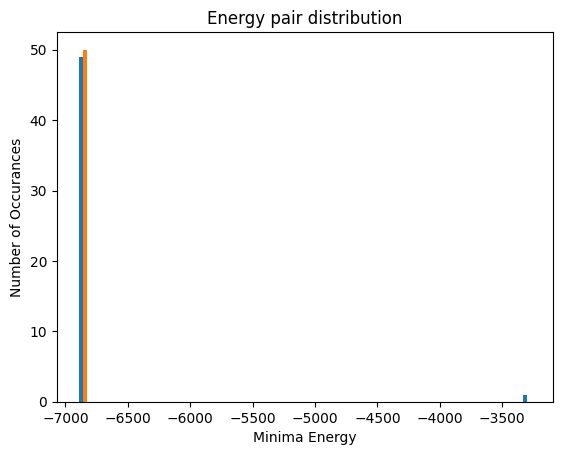

In [11]:
#histogram of energy pair distribution, blue = 1st half, orange = 2nd half
plt.hist((sample1,sample2), bins=50)
plt.xlabel("Minima Energy")
plt.ylabel("Number of Occurances")
plt.title('Energy pair distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

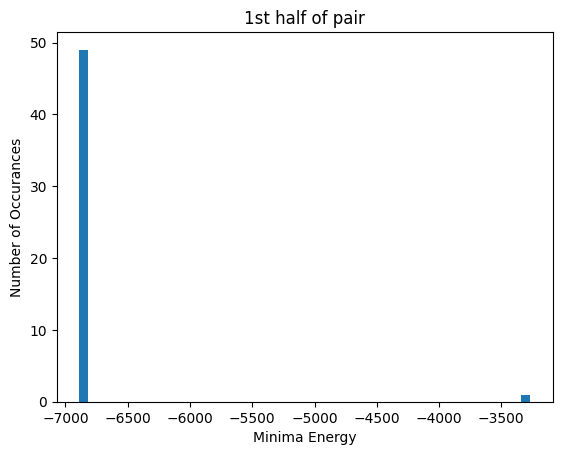

In [12]:
#energy distribution of the 1st half of the selected minima
plt.hist(sample1, bins=50)
plt.xlabel("Minima Energy")
plt.ylabel("Number of Occurances")
plt.title('1st half of pair')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

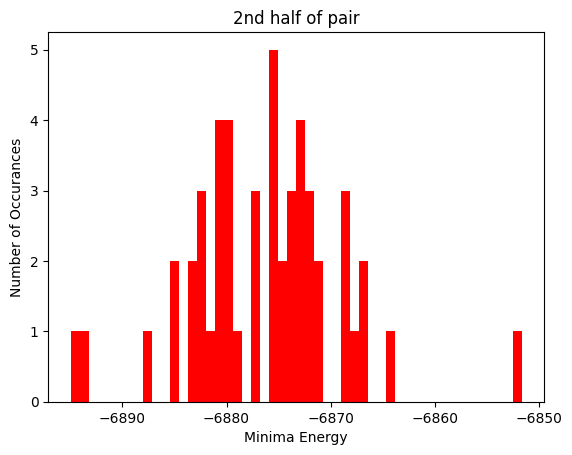

In [13]:
#energy distribution of the 2nd half of the selected minima
plt.hist(sample2, bins=50, color='red')
plt.xlabel("Minima Energy")
plt.ylabel("Number of Occurances")
plt.title('2nd half of pair')
plt.show

<Axes: title={'center': 'Energy levels for each chosen pair'}, xlabel='Minima Pair', ylabel='Energy'>

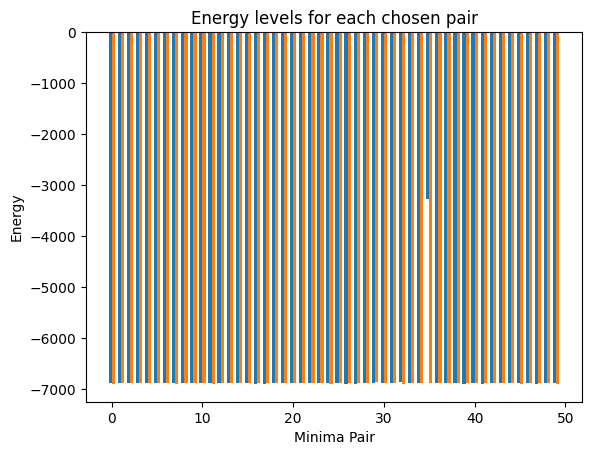

In [14]:
#plotting the energy levels of the chosen pairs
xx, yy = zip(*sample)
group_labels = list(range(0, len(sample)))
x = np.arange(len(group_labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, xx, width)
rects2 = ax.bar(x + width/2, yy, width)
ax.set_title('Energy levels for each chosen pair')
ax.set_xlabel('Minima Pair')
ax.set_ylabel('Energy')
ax

In [71]:
#loop to find the energy differences between each pair
energy_diff=list()
for i in range(0,len(sample)):
    temp = abs(sample1[i]-sample2[i])
    energy_diff.append(temp)

energy_diff

[2.1006606185092096,
 4.079603950163801,
 22.758452374383523,
 11.347456313736075,
 11.162798059032866,
 0.7255004823746276,
 13.75867308056695,
 5.41386994397908,
 12.757067118262057,
 2584.4423118189998,
 0.5441003747664581,
 10.485436923921952,
 13.812136159906913,
 3.646038373776719,
 15.597339601134081,
 0.07107327489302406,
 12.995800379149841,
 9.308874398870103,
 9.311587722877448,
 16.032475248482115,
 8.383798152031886,
 0.501325205055764,
 13.303441424891389,
 3.1901514262890487,
 17.809705855594075,
 17.733911396551775,
 2653.5817353132434,
 6.992755931452848,
 2.2287935251433737,
 18.288442011501502,
 8.544844744371403,
 3.374460379502125,
 5.788483246386022,
 25.535637413483528,
 5.683637690011892,
 11.016307538506226,
 8.6705986702691,
 1.3596527625613817,
 9.355687464648327,
 17.53975944342892,
 0.5500985782300631,
 1.7927997614087872,
 2655.2873256918056,
 2.0935385694701836,
 7.077174529439617,
 9.042295923175516,
 8.636801084392573,
 0.022403844312066212,
 5.34954768

In [101]:
#filter that removes energy values greater than 150 from the energy differences
for i in range(0, 50):
    if abs(energy_diff[i]) > 150:
        print(energy_diff[i])
        sample.remove(sample[i])
        sample1.remove(sample1[i])
        sample2.remove(sample2[i])
        energy_diff.remove(energy_diff[i])

IndexError: list index out of range

In [77]:
len(energy_diff)

47

Text(0, 0.5, 'Number of Occurances')

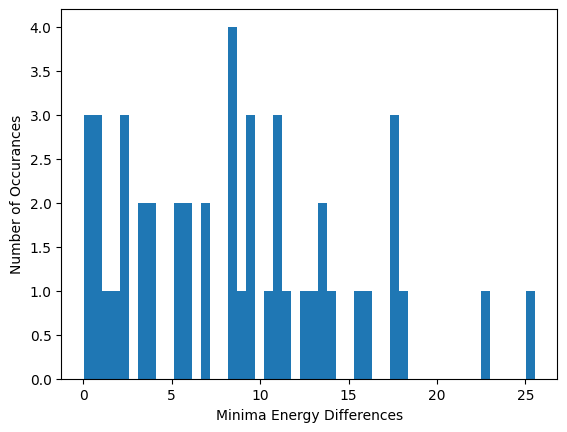

In [78]:
#histogram/distribution of energy differences between each pair
plt.hist(energy_diff, bins=50)
plt.xlabel("Minima Energy Differences")
plt.ylabel("Number of Occurances")
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

<Axes: title={'center': 'Energy differences for each chosen pair'}, xlabel='Minima Pair', ylabel='Energy Difference'>

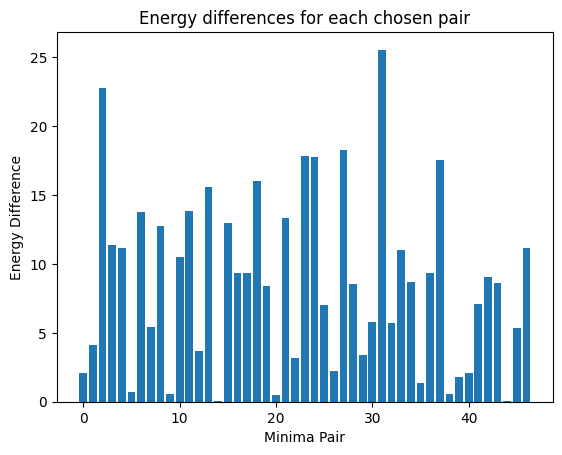

In [79]:
#plotting the energy differences for each pair
group_labels = list(range(0, len(energy_diff)))
x = np.arange(len(group_labels))

fig, ax = plt.subplots()
ax.bar(group_labels, energy_diff)
ax.set_title('Energy differences for each chosen pair')
ax.set_xlabel('Minima Pair')
ax.set_ylabel('Energy Difference')
ax

<Axes: >

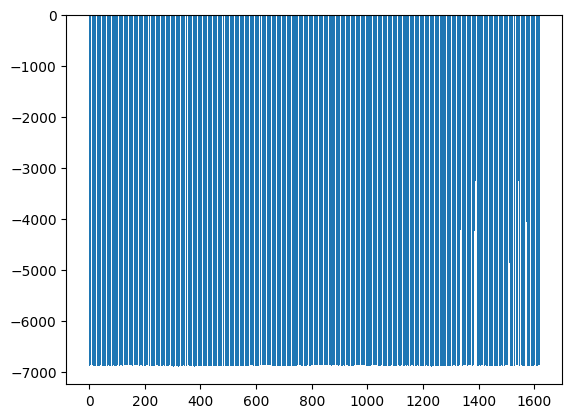

In [80]:
#plot showing the overall energy for each minima in the database
group_labels = list(range(0, len(min_energy)))
x = np.arange(len(group_labels))

fig, ax = plt.subplots()
ax.bar(group_labels, min_energy)
ax

## Picking pairs using actual pathlengths from graph

## Create graph

Since the data starts indexing from 1 while python and igraph indexes from 0, dummy values will need to be added to ensure consistency, otherwise the transition state data will be referencing incorrect minima.
This means that there is actually 1 extra node (node 0) and edge (edge 0) in the graph. This contain NaN values and should not be used, they cannot be deleted as this causes indexing to start from 0.

In [22]:
#import libraries
import igraph
import numpy as np
import pandas as pd

In [23]:
#load in data files
min_data = pd.read_table('C:/Users/ckcho/OneDrive/Desktop/KCL Bioinformatics/Research_project/TAR/min.data', header=None, sep='\s+')
ts_data = pd.read_table('C:/Users/ckcho/OneDrive/Desktop/KCL Bioinformatics/Research_project/TAR/ts.data', header=None, sep='\s+')
print(min_data.shape, ts_data.shape)

(1621, 6) (1674, 8)


In [24]:
from collections import defaultdict
#slice out free energy values and indexes
min_energy = min_data[0]
min_energy.index +=1

ts_index = ts_data[[3,4]]
ts_energy = ts_data[[0]]
ts_index.index +=1
ts_energy.index +=1


In [25]:
#add extra row with dummy data to ts indexing data to ensure indexing consistency
ts_index.loc[0] = [0,0]
ts_index.sort_index(inplace=True) 
ts_index

C:\Users\ckcho\AppData\Local\Temp\ipykernel_11928\3029229872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_index.loc[0] = [0,0]
C:\Users\ckcho\AppData\Local\Temp\ipykernel_11928\3029229872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_index.sort_index(inplace=True)


,3,4
0,0,0
1,4,1
2,5,6
3,7,8
4,9,10
...,...,...
1670,1615,1616
1671,1617,1618
1672,1323,1084
1673,1619,1620


In [26]:
# igraph uses vertices and edge IDs, not actual values so use index as IDs
from igraph import Graph
g = Graph()
g = Graph.DataFrame(ts_index, directed=False)
print(g)

IGRAPH U--- 1622 1675 --
+ edges:
0--0 1--4 5--6 7--8 9--10 11--12 13--14 15--16 17--18 19--20 21--22 23--24
25--26 27--28 29--30 31--32 1--33 4--34 16--35 36--37 38--39 9--40 41--42
12--25 8--43 43--44 44--45 7--13 14--28 27--46 46--47 48--49 30--50 32--50
16--51 52--53 34--35 2--54 54--55 18--55 10--56 17--57 10--58 59--60 61--62
12--63 11--45 47--49 29--64 48--64 33--65 66--67 17--68 39--40 69--70 14--71
72--73 74--75 66--74 65--76 77--78 19--79 22--80 81--82 83--84 85--86 87--88
62--89 90--91 92--93 94--95 45--71 53--96 16--72 15--73 34--97 55--98 78--98
19--78 99--100 21--101 102--103 42--104 105--106 92--107 95--107 26--93 26--63
80--108 21--109 110--111 41--112 113--114 115--116 117--118 61--119 46--120
31--121 96--121 122--123 124--125 126--127 128--129 130--131 132--133 134--135
136--137 1--137 134--138 139--140 141--142 143--144 145--146 147--148 149--150
151--152 153--154 155--156 157--158 159--160 34--161 162--163 164--165
166--167 140--168 169--170 171--172 143--173 174--1

In [27]:
#assign minima energy to the verticies
for i in range(1,(len(min_energy)+1)):
    g.vs[i]["energy"] = [min_energy[i]]

In [28]:
#add extra row with dummy data to ts energy data to ensure indexing consistency
ts_energy.loc[0] = [np.nan]
ts_energy.sort_index(inplace=True) 
ts_energy = list(zip(ts_energy[0]))
ts_energy

C:\Users\ckcho\AppData\Local\Temp\ipykernel_11928\4162652306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_energy.loc[0] = [np.nan]
C:\Users\ckcho\AppData\Local\Temp\ipykernel_11928\4162652306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_energy.sort_index(inplace=True)


[(nan,),
 (-6873.634398168551,),
 (-6853.75404977499,),
 (-6860.489376341518,),
 (-6860.942934237704,),
 (-6865.165206140573,),
 (-6860.988071828986,),
 (-6880.590688826697,),
 (-6879.383138501547,),
 (-6879.53869032511,),
 (-6862.940435221228,),
 (-6869.8197786397,),
 (-6864.959136713897,),
 (-6863.582712420446,),
 (-6874.839575591701,),
 (-6877.12981508046,),
 (-6876.820931557131,),
 (-6880.280018477348,),
 (-6882.517269761304,),
 (-6879.807938818418,),
 (-6878.365139834084,),
 (-6876.218405567803,),
 (-6857.321660543012,),
 (-6865.786675337913,),
 (-6861.2289857839405,),
 (-6861.935539438554,),
 (-6862.656953422758,),
 (-6861.688565993403,),
 (-6866.489612030897,),
 (-6877.624806685873,),
 (-6877.62377192047,),
 (-6878.1951003696,),
 (-6874.468914467756,),
 (-6883.851686878848,),
 (-6881.972323856747,),
 (-6877.932879161761,),
 (-6884.95576242036,),
 (-6877.757270983928,),
 (-6879.339155999066,),
 (-6879.916247704253,),
 (-6862.486380573047,),
 (-6881.179601190292,),
 (-6865.3703808

Calcultaing edge weights with exp(E/kT) or just E

    Currently just using E which is transition state energy minus the lowest minimum in the entire set

In [29]:
#calculate edge weights
edge_weights = list()
for i in range (1, (len(ts_index))):
    temp = abs(ts_energy[i]-(np.nanmin(min_energy)))
    edge_weights.append(temp)

#insert a zero to weight the dummy edge
edge_weights.insert(0, np.float64(0))
edge_weights

[np.float64(0.0),
 array([21.32399831]),
 array([41.2043467]),
 array([34.46902014]),
 array([34.01546224]),
 array([29.79319034]),
 array([33.97032465]),
 array([14.36770765]),
 array([15.57525798]),
 array([15.41970615]),
 array([32.01796126]),
 array([25.13861784]),
 array([29.99925977]),
 array([31.37568406]),
 array([20.11882089]),
 array([17.8285814]),
 array([18.13746492]),
 array([14.678378]),
 array([12.44112672]),
 array([15.15045766]),
 array([16.59325665]),
 array([18.73999091]),
 array([37.63673594]),
 array([29.17172114]),
 array([33.7294107]),
 array([33.02285704]),
 array([32.30144306]),
 array([33.26983049]),
 array([28.46878445]),
 array([17.33358979]),
 array([17.33462456]),
 array([16.76329611]),
 array([20.48948201]),
 array([11.1067096]),
 array([12.98607262]),
 array([17.02551732]),
 array([10.00263406]),
 array([17.2011255]),
 array([15.61924048]),
 array([15.04214878]),
 array([32.47201591]),
 array([13.77879529]),
 array([29.58801566]),
 array([23.22432781]),


In [30]:
#convert np arrays into floats because igraph has weird interactions with this
edge_weights = [float(val) for val in edge_weights]

C:\Users\ckcho\AppData\Local\Temp\ipykernel_11928\3794181646.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  edge_weights = [float(val) for val in edge_weights]


In [31]:
#loop to assign weights to each edge/transition state
for i in range (0, (len(ts_energy))):
    g.es[i]["weight"] = [edge_weights[i]]

In [32]:
#check if graph is now weighted
g.is_weighted()

True

### Using a directed graph

In [ ]:
dg = g.as_directed(mode='mutual')

In [ ]:
for i in range(1,(len(min_energy)+1)):
    dg.vs[i]["energy"] = min_energy[i]

In [ ]:
for i in range (0, (len(edge_weights))):
    dg.es[i]["weight"] = [edge_weights[i]]

## Finding paths

In [104]:
#match energies from chosen minima pairs with original min energy and get indicies
start = [i for i, item in enumerate(min_energy) if item in sample1]
end = [i for i, item in enumerate(min_energy) if item in sample2]

In [34]:
#get the distances between the chosen pairs
paths = dg.distances(source = start, target = end, mode = 'out', algorithm='dijkstra')
#conver list of lists into an array
paths = np.asarray(paths)

NameError: name 'dg' is not defined

In [ ]:
#replace all inf values with nan so it does not show up on the histogram
paths[~np.isfinite(paths)] = np.nan
paths

array([[89.,  4., 80., ..., nan, nan, nan],
       [94., 15., 85., ..., nan, nan, nan],
       [28., 63., 19., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

Text(0, 0.5, 'Counts')

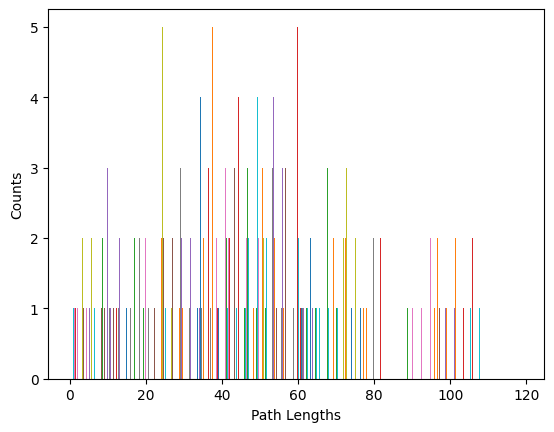

In [ ]:
#plot histogram of path lengths
plt.hist(paths, bins=50)
plt.xlabel("Path Lengths")
plt.ylabel("Counts")

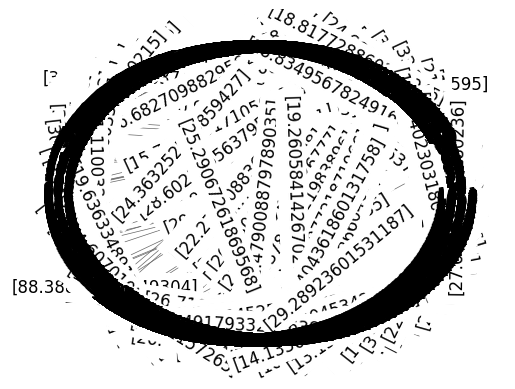

In [ ]:
g.es['width'] = 0.5
g.es[paths[0]]['width'] = 2.5

fig, ax = plt.subplots()
igraph.plot(
    g,
    target=ax,
    layout='circle',
    vertex_color='steelblue',
    vertex_label=range(g.vcount()),
    edge_width=g.es['width'],
    edge_label=g.es["weight"],
    edge_color='#666',
    edge_align_label=True,
    edge_background='white'
)
plt.show()

Now change the weights into exp(E/kT) where kT = 0.616

In [ ]:
E = edge_weights
kT = 0.616

import math
new_edge_weights = list()
for i in edge_weights:
    temp = np.exp(i/kT)
    new_edge_weights.append(temp)

new_edge_weights

C:\Users\ckcho\AppData\Local\Temp\ipykernel_1420\3842552663.py:7: RuntimeWarning: overflow encountered in exp
  temp = np.exp(i/kT)


[np.float64(1.0),
 np.float64(1081235080498412.8),
 np.float64(1.1221040349346746e+29),
 np.float64(2.0020252468347038e+24),
 np.float64(9.587393885223412e+23),
 np.float64(1.0113456592063706e+21),
 np.float64(8.909995960145819e+23),
 np.float64(13476331154.64763),
 np.float64(95702447065.26614),
 np.float64(74345613576.08539),
 np.float64(3.7446860802906435e+22),
 np.float64(5.2883059855454163e+17),
 np.float64(1.413134193732105e+21),
 np.float64(1.320063707682472e+22),
 np.float64(152841647842190.2),
 np.float64(3711667201070.748),
 np.float64(6128288112854.36),
 np.float64(22315240635.808914),
 np.float64(590590997.1340455),
 np.float64(48020738241.0666),
 np.float64(499615652432.649),
 np.float64(16297994333074.592),
 np.float64(3.42597081926126e+26),
 np.float64(3.6876459694305706e+20),
 np.float64(6.02597749081918e+23),
 np.float64(1.913773637459949e+23),
 np.float64(5.933032793442329e+22),
 np.float64(2.8576737986132833e+23),
 np.float64(1.1780462085216787e+20),
 np.float64(1661

In [ ]:
np.isinf(new_edge_weights)

array([False, False, False, ..., False, False, False])

In [ ]:
new_edge_weights[0] = 0

In [ ]:
new_edge_weights

[0,
 np.float64(1081235080498412.8),
 np.float64(1.1221040349346746e+29),
 np.float64(2.0020252468347038e+24),
 np.float64(9.587393885223412e+23),
 np.float64(1.0113456592063706e+21),
 np.float64(8.909995960145819e+23),
 np.float64(13476331154.64763),
 np.float64(95702447065.26614),
 np.float64(74345613576.08539),
 np.float64(3.7446860802906435e+22),
 np.float64(5.2883059855454163e+17),
 np.float64(1.413134193732105e+21),
 np.float64(1.320063707682472e+22),
 np.float64(152841647842190.2),
 np.float64(3711667201070.748),
 np.float64(6128288112854.36),
 np.float64(22315240635.808914),
 np.float64(590590997.1340455),
 np.float64(48020738241.0666),
 np.float64(499615652432.649),
 np.float64(16297994333074.592),
 np.float64(3.42597081926126e+26),
 np.float64(3.6876459694305706e+20),
 np.float64(6.02597749081918e+23),
 np.float64(1.913773637459949e+23),
 np.float64(5.933032793442329e+22),
 np.float64(2.8576737986132833e+23),
 np.float64(1.1780462085216787e+20),
 np.float64(1661836564614.6829

In [40]:
import sys
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

In [ ]:
np.exp(1836.33961382/kT)

C:\Users\ckcho\AppData\Local\Temp\ipykernel_1420\2661683680.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(1836.33961382/kT)


np.float64(inf)

In [82]:
paths = g.distances(source = start, target = end, weights=edge_weights, mode = 'out', algorithm='auto')

In [83]:
paths = np.asarray(paths)
#replace all inf values with nan so it does not show up on the histogram
paths[~np.isfinite(paths)] = np.nan
paths

array([[          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [1672.12191041,  205.7279597 , 1574.09227847, ...,           nan,
                  nan,           nan],
       [1551.54823928,   85.15428857, 1453.51860735, ...,           nan,
                  nan,           nan],
       ...,
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
                  nan,           nan],
       [          nan,           nan,           nan, ...,           nan,
         102.47822281,           nan]])

d:\Python 3.11\Lib\site-packages\matplotlib\axes\_axes.py:7065: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
d:\Python 3.11\Lib\site-packages\matplotlib\axes\_axes.py:7066: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


Text(0, 0.5, 'Counts')

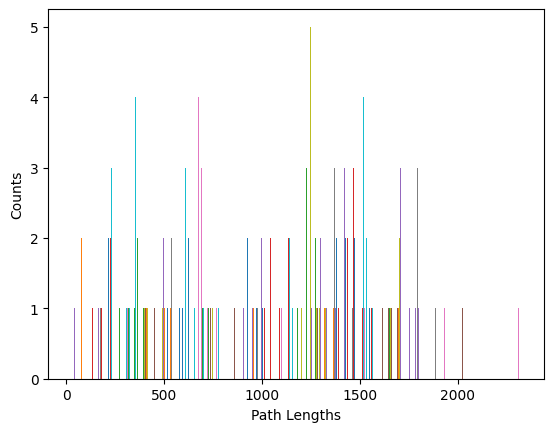

In [84]:
#plot histogram of path lengths
plt.hist(paths, bins=50)
plt.xlabel("Path Lengths")
plt.ylabel("Counts")

In [44]:
paths

array([[139.75936539,  53.14180949, 904.66399223, ...,          nan,
                 nan,          nan],
       [192.2996851 , 105.6821292 , 957.20431194, ...,          nan,
                 nan,          nan],
       [197.57237915,  88.84725094, 962.47700598, ...,          nan,
                 nan,          nan],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])

### Extracting Paths

In [99]:
len(sample)

50

In [106]:
final_paths = list()
for i in range(0, len(sample1)):
    results = g.get_shortest_paths(v=sample1.index(sample1[i]), to=end, weights=edge_weights, output="epath")
    final_paths.append(results)

C:\Users\ckcho\AppData\Local\Temp\ipykernel_11928\2597725889.py:3: RuntimeWarning: Couldn't reach some vertices. at src/paths/dijkstra.c:534
  results = g.get_shortest_paths(v=sample1.index(sample1[i]), to=end, weights=edge_weights, output="epath")


In [107]:
final_paths

[[[],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  [],
  []],
 [[1,
   175,
   227,
   226,
   344,
   343,
   337,
   338,
   339,
   33,
   284,
   285,
   173,
   205,
   121,
   148,
   206,
   230,
   149,
   178,
   569,
   570,
   1206,
   1207,
   1205,
   1209,
   1217,
   1419,
   1418,
   1420,
   1417,
   1421,
   1416,
   1422,
   1672,
   1200,
   842,
   839,
   215,
   241,
   302,
   303,
   132,
   305,
   304,
   242,
   243,
   313,
   246,
   323,
   582,
   584,
   583,
   1346,
   1347,
   1345,
   1353,
   1349,
   1358,
   1348,
   1354,
   1351,
   1350,
   1342,
   1355,
   1372,
   1373,
   1374,
   1369,
   1382,
   353,
   352,
   310,
   101,
   168,
   169,
   432,
   418,
   425,
   489,
   490,
   488,
   492,
   491,
   549,
   552,
 

## Transition state distribution and selection

In [ ]:
#examining ts.data distribution
#splitting selected pairs into 1st half and 2nd half for graphing and calculation later
sample1 = (list(zip(*ts_energy))[0])
sample2 = (list(zip(*ts_energy))[1])

In [ ]:
len(ts_energy)

1675

In [ ]:
#loop for finding energy differences
energy_diff=list()
for i in range(1,len(ts_energy)):
    temp = abs(sample1[i]-sample2[i])
    energy_diff.append(temp)

energy_diff

[187530.13165156625,
 187492.57106240126,
 187509.9894730381,
 187508.10418480274,
 187518.77135310462,
 187513.84221884506,
 187548.14042552508,
 187532.73951293796,
 187531.43554814538,
 187499.25834732776,
 187525.25950300487,
 187513.67690006102,
 187517.1866165373,
 187546.93721231725,
 187552.275600426,
 187535.90865967306,
 187545.86074836095,
 187558.74825480697,
 187545.0542700429,
 187549.3383407865,
 187539.0164556295,
 187496.99666850656,
 187518.54584383118,
 187512.57388285457,
 187514.67644578093,
 187517.2672536049,
 187514.8510707354,
 187521.4611569756,
 187559.55243031698,
 187559.77494618905,
 187562.40100530465,
 187544.51920712064,
 187565.1699591872,
 187551.05341297903,
 187543.82189279768,
 187556.17369218197,
 187522.45097664313,
 187524.84587679507,
 187525.52292366425,
 187512.7138077569,
 187549.18263527306,
 187509.20365747245,
 187515.48361260112,
 187501.50168692958,
 187512.5927736936,
 187525.23743168983,
 187561.2643954078,
 187560.05446255446,
 18756

In [ ]:
#filter that removes energy values greater than 150 from the energy differences
#for i in range(0, len(energy_diff)):
#    if abs(energy_diff[i]) > 150:
#        print(energy_diff[i])
#        energy_diff.remove(i)

#commented out as the differences between ts data and min data are different

Text(0, 0.5, 'Number of Occurances')

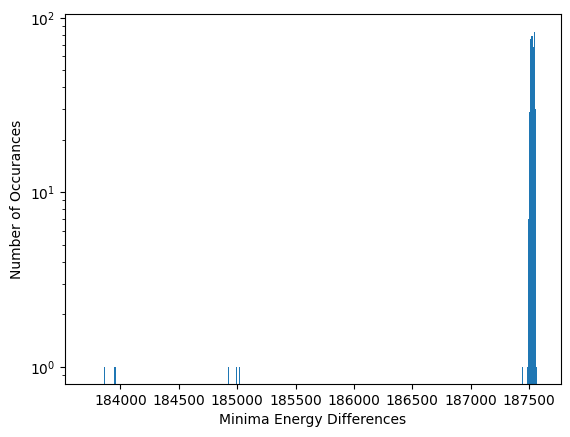

In [ ]:
#histogram/distribution of energy differences for each transition state
plt.hist(energy_diff, bins=1675, log=True)
plt.xlabel("Minima Energy Differences")
plt.ylabel("Number of Occurances")

<Axes: title={'center': 'Energy differences for each transition state'}, xlabel='Minima Pair', ylabel='Energy Difference'>

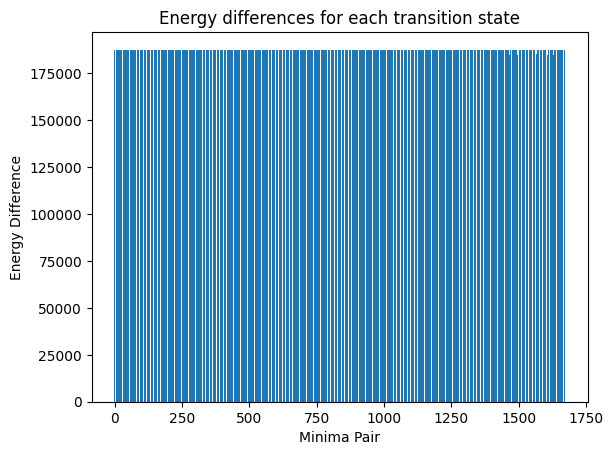

In [ ]:
#plotting the energy differences for each transition state
group_labels = list(range(0, len(energy_diff)))
x = np.arange(len(group_labels))

fig, ax = plt.subplots()
ax.bar(group_labels, energy_diff)
ax.set_title('Energy differences for each transition state')
ax.set_xlabel('Minima Pair')
ax.set_ylabel('Energy Difference')
ax

In [ ]:
#using random sample to randomly select actual transition states from ts.data
ts_pairs = random.sample(ts_energy, 50)

In [ ]:
#splitting selected pairs into 1st half and 2nd half for graphing and calculation later
sample1 = (list(zip(*ts_pairs))[0])
sample2 = (list(zip(*ts_pairs))[1])

In [ ]:
#loop to find the energy differences between each pair
energy_diff=list()
for i in range(0,len(sample)):
    temp = abs(sample1[i]-sample2[i])
    energy_diff.append(temp)

energy_diff

[187548.4905490496,
 187520.41521445184,
 187506.6320463146,
 187505.786203413,
 187514.24086275182,
 187526.71107142812,
 187504.60504969058,
 187541.32638024137,
 187498.51812713649,
 187519.68170378305,
 187524.7927392398,
 187520.3615953053,
 187552.76663073245,
 187536.04400545647,
 187525.60858871843,
 187521.62539263623,
 187518.3230826604,
 187520.48345618523,
 187539.32774665786,
 187521.89209328766,
 187525.43990706137,
 187526.24369002972,
 187527.92934026086,
 187534.53202712463,
 187524.79925177677,
 187538.72618151756,
 187544.97827281783,
 187503.87349677453,
 187546.00777078245,
 187548.49777538155,
 187538.5014728559,
 187540.96454956642,
 187505.04511552624,
 187545.08179084148,
 187547.4848039144,
 187528.55007113278,
 187542.4231501145,
 187525.93508142422,
 187509.8851498389,
 nan,
 187515.3535738833,
 184935.33665465206,
 187547.502544424,
 187536.05737285898,
 187516.98832553753,
 187543.40321880177,
 187521.61791763682,
 187549.49049925848,
 187542.54006755524,


Text(0, 0.5, 'Number of Occurances')

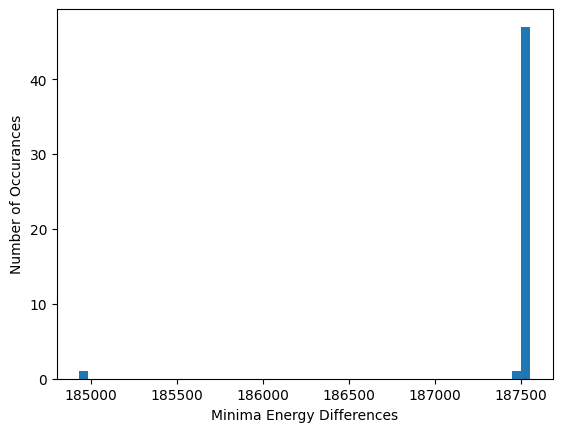

In [ ]:
#histogram/distribution of energy differences between each pair
plt.hist(energy_diff, bins=50)
plt.xlabel("Minima Energy Differences")
plt.ylabel("Number of Occurances")
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

<Axes: title={'center': 'Energy differences for each transition state'}, xlabel='Minima Pair', ylabel='Energy Difference'>

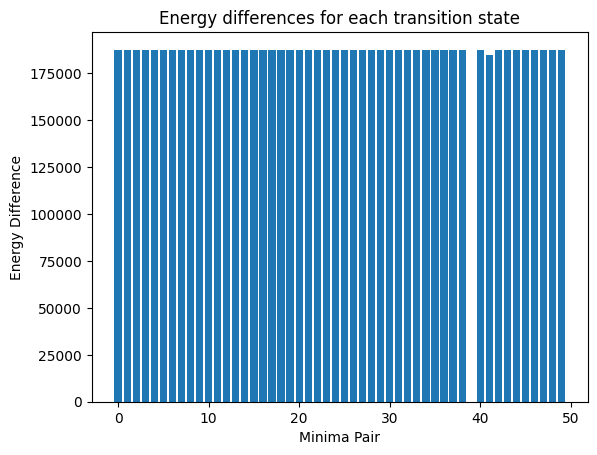

In [ ]:
#plotting the energy differences for each transition state
group_labels = list(range(0, len(energy_diff)))
x = np.arange(len(group_labels))

fig, ax = plt.subplots()
ax.bar(group_labels, energy_diff)
ax.set_title('Energy differences for each transition state')
ax.set_xlabel('Minima Pair')
ax.set_ylabel('Energy Difference')
ax